In [2]:
import os
from pathlib import Path

import tensorflow as tf
import tensorflow_io as tfio
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from src.data.drive import tf_random_crop, tf_random_rotate, get_dataset

os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [10]:
ds = get_dataset().cache()

In [13]:
images, masks, segmentations = next(ds.batch(20).as_numpy_iterator())

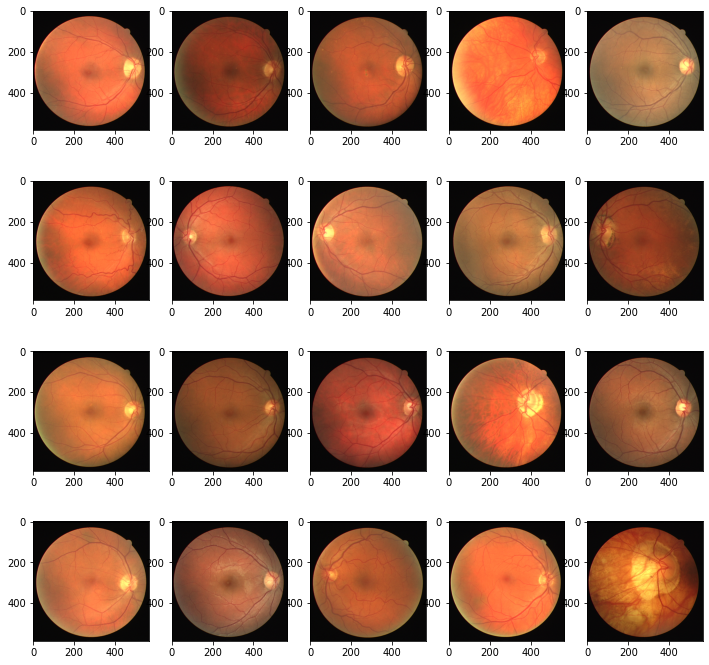

In [14]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(images[i, ...])


In [49]:
def standardize(image):
    image_min = tf.reduce_min(image)
    return (image - image_min) / (tf.reduce_max(image) - image_min)


def float_to_int32(image):
    return tf.cast(image * (2**32 - 1), tf.int32)


In [48]:
f = lambda x: standardize(tf.image.adjust_jpeg_quality(x,0.8))
ds_aug = ds.map(lambda x, y, z, : (f(x), y, z)).batch(20)


TypeError: in user code:

    <ipython-input-7-12bf3c0a395e>:2 None  *
        lambda x, y, z, : (f(x), y, z))
    <ipython-input-48-2487d954d632>:1 None  *
        lambda x: standardize(tf.image.adjust_jpeg_quality(x,0.8))
    /home/valentin/python_wkspce/2d_bispectrum_cnn/env/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:201 wrapper  **
        return target(*args, **kwargs)
    /home/valentin/python_wkspce/2d_bispectrum_cnn/env/lib/python3.6/site-packages/tensorflow/python/ops/image_ops_impl.py:2682 adjust_jpeg_quality
        jpeg_quality = ops.convert_to_tensor(jpeg_quality, dtype=dtypes.int32)
    /home/valentin/python_wkspce/2d_bispectrum_cnn/env/lib/python3.6/site-packages/tensorflow/python/profiler/trace.py:163 wrapped
        return func(*args, **kwargs)
    /home/valentin/python_wkspce/2d_bispectrum_cnn/env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:1540 convert_to_tensor
        ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
    /home/valentin/python_wkspce/2d_bispectrum_cnn/env/lib/python3.6/site-packages/tensorflow/python/framework/tensor_conversion_registry.py:52 _default_conversion_function
        return constant_op.constant(value, dtype, name=name)
    /home/valentin/python_wkspce/2d_bispectrum_cnn/env/lib/python3.6/site-packages/tensorflow/python/framework/constant_op.py:265 constant
        allow_broadcast=True)
    /home/valentin/python_wkspce/2d_bispectrum_cnn/env/lib/python3.6/site-packages/tensorflow/python/framework/constant_op.py:283 _constant_impl
        allow_broadcast=allow_broadcast))
    /home/valentin/python_wkspce/2d_bispectrum_cnn/env/lib/python3.6/site-packages/tensorflow/python/framework/tensor_util.py:457 make_tensor_proto
        _AssertCompatible(values, dtype)
    /home/valentin/python_wkspce/2d_bispectrum_cnn/env/lib/python3.6/site-packages/tensorflow/python/framework/tensor_util.py:337 _AssertCompatible
        (dtype.name, repr(mismatch), type(mismatch).__name__))

    TypeError: Expected int32, got 0.8 of type 'float' instead.


In [45]:
images, masks, segmentations = next(ds_aug.as_numpy_iterator())

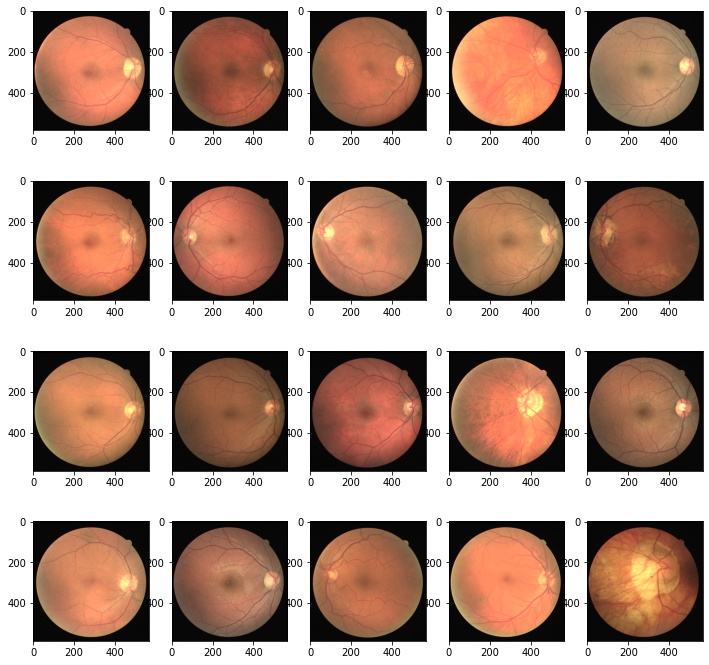

In [46]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(images[i, ...])

In [47]:
tf.math.reduce_min(images)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>